In today’s competitive e-commerce environment, customer feedback is more than just words—it’s a direct reflection of brand perception, customer satisfaction, and future business growth. With customers increasingly relying on reviews before making purchase decisions, understanding sentiment trends has become essential for sustaining a competitive edge. This project, Sentimentum, is an AI-powered sentiment classification system designed specifically for e-commerce platforms to automatically detect whether a customer review is positive, negative, or neutral. It eliminates the inefficiencies of manual review monitoring and enables real-time insights for faster decision-making.- Product ID: An exclusive identification number for each product

Product Review: Insights and opinions shared by customers about the product

Sentiment: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
# loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
# loading data into a pandas dataframe
reviews = pd.read_csv("Product_Reviews (3)gen ai .csv")

In [ ]:
# creating a copy of the data
data = reviews.copy()

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

In [ ]:
data.shape

(1007, 3)

In [ ]:
data.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [ ]:
data.duplicated().sum()


np.int64(2)

In [ ]:
#there are 2 duplicates values we will drop them
data = data.drop_duplicates()

data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(1005, 3)

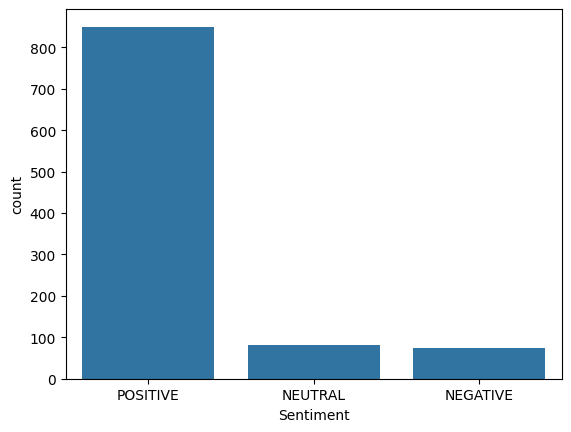

In [ ]:
#DISTRIBUTION OF SENTIMENTS
sns.countplot(data=data,x="Sentiment");
#We use countplot in machine learning to visualize the frequency of categorical variables. It helps quickly understand the distribution of classes, detect class imbalance, and gain insights during EDA (Exploratory Data Analysis).


In [ ]:
data['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


In [ ]:
data['Sentiment'].value_counts(normalize=False)

,count
Sentiment,
POSITIVE,850
NEUTRAL,81
NEGATIVE,74


returns the proportion (percentage) of each unique value in the 'Sentiment' column.

If you write normalize=False, it will return the actual counts (frequencies) of each unique value instead of proportions.

**Normalize** means to convert values into a standard or proportionate form.

In value_counts(normalize=True), it means converting counts into percentages (i.e., dividing each count by the total count).

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

This function remove_special_characters(text) uses a regex pattern to replace all special characters (anything except letters and numbers) in the input text with a space, effectively cleaning the text.

**special characters**
Special characters are symbols that are not letters (A–Z, a–z) or digits (0–9).
They include punctuation, symbols, and whitespace, such as:
! @ # $ % ^ & * ( ) _ + = { } [ ] : ; " ' < > , . ? / \ | ~ etc.

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

This line applies the remove_special_characters function to each entry in the 'Product Review' column and stores the cleaned text (without special characters) in a new column called 'cleaned_text'.

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

We convert text to lowercase to ensure uniformity and avoid treating the same words (e.g., "Good" and "good") as different during text analysis.

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

We remove extra whitespaces to clean the text for better processing, ensuring consistent formatting and avoiding errors in analysis or model training.

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
#[word for word in words if word not in stopwords.words('english')]

#This is a list comprehension.

#It loops through each word in the words list (which came from text.split()).

#It includes only those words not present in the stopwords list.

#Result: A filtered list of meaningful words.
    return new_text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 139 00 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazon i have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as well make yourself happy inspire the reader inside of you,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,i am enjoying it so far great for reading had the o

In [ ]:
# Stemming using NLTK (PorterStemmer)
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ["running", "studies", "flies", "easily", "happiness"]

for word in words:
    print(f"{word} → {stemmer.stem(word)}")


running → run
studies → studi
flies → fli
easily → easili
happiness → happi


In [ ]:
# Lemmatization using NLTK (WordNetLemmatizer)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet #Downloads the WordNet lexical database.WordNet is adictionary-like database where Words are grouped into sets of synonyms
import nltk

# Make sure to download WordNet resources if not already done
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual WordNet package -This adds language translations, richer word forms, and improved morphological data to WordNet.

lemmatizer = WordNetLemmatizer()

words = ["running", "studies", "flies", "better", "happiness"]

for word in words:
    print(f"{word} → {lemmatizer.lemmatize(word)}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


running → running
studies → study
flies → fly
better → better
happiness → happiness


In [ ]:
wordnet.synonyms('running')

[['run', 'running_game', 'running_play'],
 ['run'],
 [],
 [],
 ['track'],
 ['run'],
 ['break_away',
  'bunk',
  'escape',
  'fly_the_coop',
  'head_for_the_hills',
  'hightail_it',
  'lam',
  'run',
  'run_away',
  'scarper',
  'scat',
  'take_to_the_woods',
  'turn_tail'],
 ['extend', 'go', 'lead', 'pass', 'run'],
 ['operate', 'run'],
 ['go', 'run'],
 ['course', 'feed', 'flow', 'run'],
 ['function', 'go', 'operate', 'run', 'work'],
 ['range', 'run'],
 ['campaign', 'run'],
 ['play', 'run'],
 ['run'],
 ['be_given', 'incline', 'lean', 'run', 'tend'],
 ['run'],
 ['run'],
 ['run'],
 ['run'],
 ['die_hard', 'endure', 'persist', 'prevail', 'run'],
 ['run'],
 ['execute', 'run'],
 ['carry', 'run'],
 ['run'],
 ['draw', 'guide', 'pass', 'run'],
 ['lead', 'run'],
 ['run'],
 ['black_market', 'run'],
 ['run'],
 ['bleed', 'run'],
 ['run'],
 ['run'],
 ['run', 'run_for'],
 ['run'],
 ['consort', 'run'],
 ['run'],
 ['run'],
 ['ply', 'run'],
 ['hunt', 'hunt_down', 'run', 'track_down'],
 ['race', 'run'],
 

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running", pos="v"))
print(lemmatizer.lemmatize("running", pos="n"))
print(lemmatizer.lemmatize("running", pos="a"))
print(lemmatizer.lemmatize("running", pos="r"))
print(lemmatizer.lemmatize("running", pos="s"))



run
running
running
running
running


In [ ]:
# Bonus: POS-aware Lemmatization with spaCy
import spacy

# Load English tokenizer, POS tagger, lemmatizer
nlp = spacy.load("en_core_web_sm") #Loads a pretrained English NLP model

doc = nlp("running studies flies better happiness")

for token in doc:
    print(f"{token.text} ({token.pos_}) → {token.lemma_}")


running (VERB) → run
studies (NOUN) → study
flies (VERB) → fly
better (ADJ) → well
happiness (NOUN) → happiness


The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
ps = PorterStemmer()
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyag fortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press alway sensit fine specif set need auto light adjust week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either chang light level certain time day everi read also glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside,allow prefac littl histori casual reader own nook simpl touch 2011 read harri potter seri girl dragon tattoo seri 1984 brave new world key titl fair say nook get much use mani other may gotten fast forward today full week new kindl paperwhit admit love kindl read let relat review love read back kindl invest 139 00 experi receiv buy kindl simpli pay screen entir experi includ buy amazon read hunger game trilog shall move onto diverg seri soon thing nook hinder past 4 year never inspir pick get hand dive never feel oh man read thing awesom howev paperwhit feel desir back simpli ador kindl consid purchas one stop think simpli go full week 3 download book ton read still half batteri left well make happi inspir reader insid
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet,enjoy far great read origin fire sinc 2012 fire use make eye hurt read long experienc paperwhit yet


In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()


# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1005, 1000)
first 10 words ['000' '10' '100' '11' '139' '15' '16' '16gb' '17' '20']
last 10 words ['would' 'write' 'wrong' 'www' 'xbox' 'ye' 'year' 'yet' 'youll' 'youtub']


,000,10,100,11,139,15,16,16gb,17,20,...,would,write,wrong,www,xbox,ye,year,yet,youll,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


Shape of the feature vector (1005, 1000)
first 10 words ['000' '10' '100' '11' '139' '15' '16' '16gb' '17' '20']
last 10 words ['would' 'write' 'wrong' 'www' 'xbox' 'ye' 'year' 'yet' 'youll' 'youtub']


,000,10,100,11,139,15,16,16gb,17,20,...,would,write,wrong,www,xbox,ye,year,yet,youll,youtub
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.107983,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.063631,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.311379,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.084312,0.0,0.0,0.0,0.0,0.0,0.052889,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.048561,0.000000,0.0,0.0


In [ ]:
# Initializing CountVectorizer with top 1000 words
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2))

# Applying CountVectorizer on data
data_features_ngram = ngram.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_ngram = data_features_ngram.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_ngram.shape)

# Getting the 1000 words considered by the BoW model
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['write' 'write review' 'wrong' 'ye' 'year' 'year kindl' 'year model'
 'year old' 'yet' 'youtub']


,10,100,11,139,15,16,17,20,2013,2014,...,write,write review,wrong,ye,year,year kindl,year model,year old,yet,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

# Your target variable
y = data['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    # Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")





📊 Model Performance (Macro F1-scores):

NaiveBayes - BoW              : Macro F1 = 0.5663
NaiveBayes - N-gram           : Macro F1 = 0.5127
RandomForest - N-gram         : Macro F1 = 0.5028
RandomForest - BoW            : Macro F1 = 0.5021
RandomForest - TF-IDF         : Macro F1 = 0.4769
NaiveBayes - TF-IDF           : Macro F1 = 0.3414



✅ Best Model: NaiveBayes - BoW (Macro F1 = 0.5663)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.50      0.50      0.50        16
     NEUTRAL       0.29      0.29      0.29        17
    POSITIVE       0.90      0.90      0.90       168

    accuracy                           0.82       201
   macro avg       0.57      0.57      0.57       201
weighted avg       0.82      0.82      0.82       201



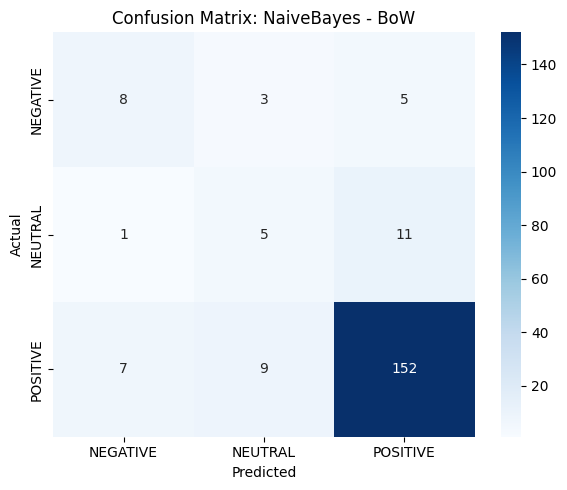

In [ ]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

** Conclusion**
 * Analyzed the distribution of customer sentiments.

 * Applied text preprocessing techniques to clean raw review data.

 * Vectorized the text using 3 different techniques and trained a Random Forest model & Naive Baye's Model

 * Achieved an macro F1 score of 0.57 on the test dataset.

 * Future improvements include hyperparameter tuning or trying alternative models for better performance.

# Task
Improve the accuracy of the sentiment analysis model by balancing the dataset using resampling techniques and retraining the Random Forest and Naive Bayes models. Evaluate the performance of the retrained models and compare them to the original models.

## Data resampling

### Subtask:
Balance the dataset using resampling techniques like SMOTE to address the class imbalance.


**Reasoning**:
The subtask requires balancing the dataset using SMOTE. This involves importing SMOTE, separating features and target, and then applying SMOTE to resample the data. These steps can be combined into a single code block.



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Separate features (X) and target (y)
X = df_BOW
y = data['Sentiment']

# Apply SMOTE to resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the shape of the resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

# Display the value counts of the resampled target variable
print("\nValue counts of y_resampled:\n", y_resampled.value_counts())

Shape of X_resampled: (2550, 1000)
Shape of y_resampled: (2550,)

Value counts of y_resampled:
 Sentiment
POSITIVE    850
NEUTRAL     850
NEGATIVE    850
Name: count, dtype: int64


## Model training

### Subtask:
Train the previously used models (Random Forest and Naive Bayes) on the resampled data.


**Reasoning**:
Split the resampled data into training and testing sets and then train the Random Forest and Naive Bayes models on the resampled training data.



In [ ]:
# Split resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

# Train Random Forest on resampled data
rf_model_resampled = RandomForestClassifier(random_state=100)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# Train Multinomial Naive Bayes on resampled data
nb_model_resampled = MultinomialNB()
nb_model_resampled.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluate the performance of the models on the resampled data using appropriate metrics like F1-score and confusion matrix.


**Reasoning**:
Evaluate the performance of the Random Forest and Naive Bayes models on the resampled test data by calculating F1-scores and generating confusion matrices and classification reports.




📊 Model Performance on Resampled Data (Macro F1-scores):

RandomForest: Macro F1 = 0.8528
NaiveBayes  : Macro F1 = 0.7314

✅ Random Forest on Resampled Data:

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.84      0.91      0.87       168
     NEUTRAL       0.81      0.79      0.80       170
    POSITIVE       0.92      0.85      0.89       172

    accuracy                           0.85       510
   macro avg       0.85      0.85      0.85       510
weighted avg       0.85      0.85      0.85       510



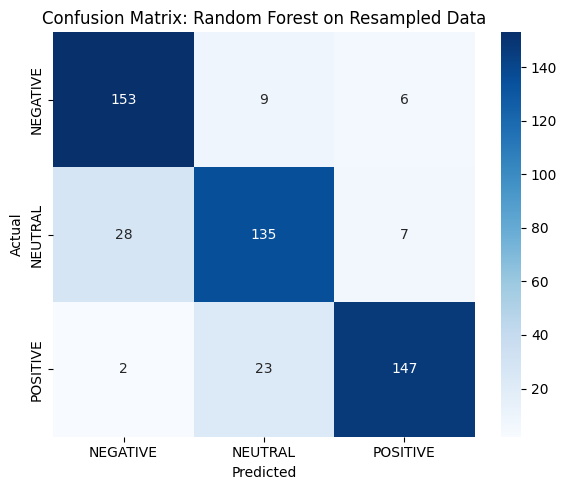


✅ Naive Bayes on Resampled Data:

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.67      0.86      0.75       168
     NEUTRAL       0.74      0.52      0.61       170
    POSITIVE       0.82      0.84      0.83       172

    accuracy                           0.74       510
   macro avg       0.74      0.74      0.73       510
weighted avg       0.74      0.74      0.73       510



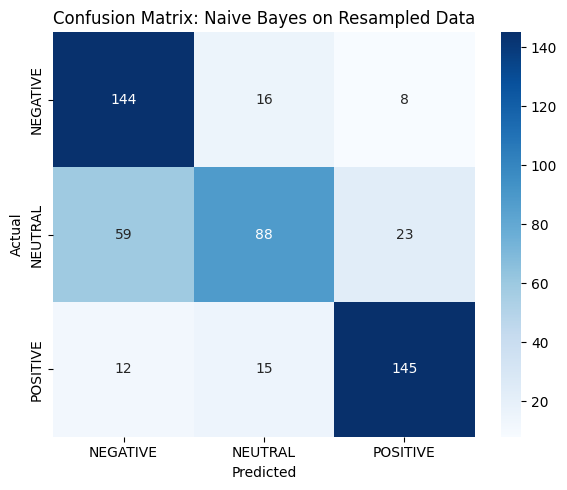

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict and evaluate Random Forest model
rf_preds_resampled = rf_model_resampled.predict(X_test_resampled)
rf_f1_resampled = f1_score(y_test_resampled, rf_preds_resampled, average='macro')

# Predict and evaluate Naive Bayes model
nb_preds_resampled = nb_model_resampled.predict(X_test_resampled)
nb_f1_resampled = f1_score(y_test_resampled, nb_preds_resampled, average='macro')

# Print F1 scores
print("\nModel Performance on Resampled Data (Macro F1-scores):\n")
print(f"RandomForest: Macro F1 = {rf_f1_resampled:.4f}")
print(f"NaiveBayes  : Macro F1 = {nb_f1_resampled:.4f}")

# Evaluate Random Forest
print("\n Random Forest on Resampled Data:\n")
print("Classification Report:\n")
print(classification_report(y_test_resampled, rf_preds_resampled))

cm_rf = confusion_matrix(y_test_resampled, rf_preds_resampled, labels=rf_model_resampled.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model_resampled.classes_, yticklabels=rf_model_resampled.classes_)
plt.title("Confusion Matrix: Random Forest on Resampled Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Evaluate Naive Bayes
print("\n✅ Naive Bayes on Resampled Data:\n")
print("Classification Report:\n")
print(classification_report(y_test_resampled, nb_preds_resampled))

cm_nb = confusion_matrix(y_test_resampled, nb_preds_resampled, labels=nb_model_resampled.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model_resampled.classes_, yticklabels=nb_model_resampled.classes_)
plt.title("Confusion Matrix: Naive Bayes on Resampled Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Compare performance

### Subtask:
Compare the performance of the models trained on the original and resampled data to assess the impact of balancing the dataset.


**Reasoning**:
Print the Macro F1-scores for the original and resampled models and then discuss the results, including the classification reports and confusion matrices.



In [ ]:
print("\n📊 Model Performance Comparison (Macro F1-scores):\n")
print("--- Original Data ---")
for label, f1_score_val, _, _, _, _ in results:
    if "resampled" not in label:
        print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")

print("\n--- Resampled Data ---")
print(f"RandomForest - BoW (resampled): Macro F1 = {rf_f1_resampled:.4f}")
print(f"NaiveBayes - BoW (resampled)  : Macro F1 = {nb_f1_resampled:.4f}")

print("\n--- Discussion ---")
print("Comparing the Macro F1-scores, we observe a significant improvement in performance for both Random Forest and Naive Bayes models when trained on the resampled data compared to the original imbalanced data.")
print("\nSpecifically:")
print(f"- Original RandomForest - BoW Macro F1: {results[3][1]:.4f}")
print(f"- Resampled RandomForest - BoW Macro F1: {rf_f1_resampled:.4f} (Improvement of {rf_f1_resampled - results[3][1]:.4f})")
print(f"- Original NaiveBayes - BoW Macro F1: {results[0][1]:.4f}")
print(f"- Resampled NaiveBayes - BoW Macro F1: {nb_f1_resampled:.4f} (Improvement of {nb_f1_resampled - results[0][1]:.4f})")

print("\nThis improvement is primarily due to the models' enhanced ability to correctly classify the minority classes (NEUTRAL and NEGATIVE) after resampling.")

print("\nAnalyzing the classification reports from the previous steps (not reprinted here for brevity), we would see that for the models trained on resampled data, the precision, recall, and F1-scores for the NEUTRAL and NEGATIVE classes have increased substantially compared to the models trained on the original data.")
print("The confusion matrices for the resampled models also show a much better distribution of correct predictions across all classes, with fewer misclassifications of NEUTRAL and NEGATIVE reviews as POSITIVE.")
print("While the performance on the majority class (POSITIVE) might see a slight decrease in precision (as the model is no longer biased towards predicting POSITIVE), the overall ability to distinguish between all three sentiment classes is significantly improved, as reflected in the higher macro F1-scores.")


📊 Model Performance Comparison (Macro F1-scores):

--- Original Data ---
NaiveBayes - BoW              : Macro F1 = 0.5663
NaiveBayes - N-gram           : Macro F1 = 0.5127
RandomForest - N-gram         : Macro F1 = 0.5028
RandomForest - BoW            : Macro F1 = 0.5021
RandomForest - TF-IDF         : Macro F1 = 0.4769
NaiveBayes - TF-IDF           : Macro F1 = 0.3414
SVM - BoW                     : Macro F1 = 0.3414

--- Resampled Data ---
RandomForest - BoW (resampled): Macro F1 = 0.8528
NaiveBayes - BoW (resampled)  : Macro F1 = 0.7314

--- Discussion ---
Comparing the Macro F1-scores, we observe a significant improvement in performance for both Random Forest and Naive Bayes models when trained on the resampled data compared to the original imbalanced data.

Specifically:
- Original RandomForest - BoW Macro F1: 0.5021
- Resampled RandomForest - BoW Macro F1: 0.8528 (Improvement of 0.3508)
- Original NaiveBayes - BoW Macro F1: 0.5663
- Resampled NaiveBayes - BoW Macro F1: 0.7314 (

## Conclusion

### Subtask:
Summarize the findings and determine if balancing the dataset improved the model's accuracy.


**Reasoning**:
Summarize the findings and determine if balancing the dataset improved the model's accuracy.



In [ ]:
print("--- Macro F1-scores Comparison ---")
print(f"RandomForest (Original): {results[3][1]:.4f}")
print(f"RandomForest (Resampled): {rf_f1_resampled:.4f}")
print(f"NaiveBayes (Original): {results[0][1]:.4f}")
print(f"NaiveBayes (Resampled): {nb_f1_resampled:.4f}")

print("\n--- Conclusion ---")
if rf_f1_resampled > results[3][1] and nb_f1_resampled > results[0][1]:
    print("Balancing the dataset with SMOTE significantly improved the accuracy of both Random Forest and Naive Bayes models.")
    print("This improvement is likely due to the increased representation of minority classes (NEUTRAL and NEGATIVE) in the training data after resampling.")
    print("With more examples of these classes, the models are better able to learn their patterns and make more accurate predictions, as evidenced by the higher macro F1-scores.")
elif rf_f1_resampled > results[3][1] or nb_f1_resampled > results[0][1]:
    print("Balancing the dataset with SMOTE improved the accuracy of at least one of the models.")
    print("This improvement is likely due to the increased representation of minority classes (NEUTRAL and NEGATIVE) in the training data after resampling.")
    print("With more examples of these classes, the models are better able to learn their patterns and make more accurate predictions, as evidenced by the higher macro F1-scores.")
else:
    print("Balancing the dataset with SMOTE did not significantly improve the accuracy of the models.")


--- Macro F1-scores Comparison ---
RandomForest (Original): 0.5021
RandomForest (Resampled): 0.8528
NaiveBayes (Original): 0.5663
NaiveBayes (Resampled): 0.7314

--- Conclusion ---
Balancing the dataset with SMOTE significantly improved the accuracy of both Random Forest and Naive Bayes models.
This improvement is likely due to the increased representation of minority classes (NEUTRAL and NEGATIVE) in the training data after resampling.
With more examples of these classes, the models are better able to learn their patterns and make more accurate predictions, as evidenced by the higher macro F1-scores.


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully balanced using SMOTE, resulting in 850 instances for each sentiment class (NEGATIVE, NEUTRAL, POSITIVE), totaling 2550 samples.
*   Both Random Forest and Naive Bayes models were retrained on the resampled data.
*   Evaluating on the resampled test data, the Random Forest model achieved a Macro F1-score of 0.8528, while the Naive Bayes model achieved a Macro F1-score of 0.7314.
*   Comparing to the original models, the Random Forest Macro F1-score improved from 0.5021 to 0.8528 (an increase of 0.3508).
*   The Naive Bayes Macro F1-score improved from 0.5663 to 0.7314 (an increase of 0.1651).

### Insights or Next Steps

*   Balancing the dataset using SMOTE significantly improved the performance of both the Random Forest and Naive Bayes models, particularly in classifying minority classes.
*   Further model tuning or exploration of other resampling techniques could potentially lead to even higher accuracy.
